In [1]:
import os,sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#indir = 'G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Results\ResStock_ComStock_2016\Level 2 data'
#outdir = os.path.join(indir, '../Consolidated figures' )
indir = '/mnt/sdb/bgerke_cache/bto_ee_dr_cache/dr_path_outputs/resstock_comstock_2016/'
outdir = os.path.join(indir, '../figures')

In [3]:
include_all = False #Whether or not to include All Measures

region_mapping = {'CAMX':'California',
                  'ERCT':'Texas',
                  'NENG':'New England'}
color_mapping = {'California':'#003262',
                 'Texas':'#bf5700',
                 #'New England':'#881c1c'}
                 'New England':'#007155'}

symbol_mapping_state = {'California':'<',
                        'Texas':(5,1,0),
                        'New England':'H'}

color_mapping_scen = {'Equipment':'darkcyan',
                      'Controls':'firebrick',
                      'Envelope':'mediumblue',
                      'Cont.+Env.':'darkviolet',
                      'All':'dimgray'
                     }
symbol_mapping = {'Equipment':'d',#'s',
                  'Controls':'d',#'o',
                  'Envelope':'d',#'p',
                  'Cont.+Env.':'d',#'P',
                  'All':'d',#(7,1,0)
                  }
colname_mapping = {'Extreme Ramp': 'Extreme Ramping Need',
                   'Peak Demand': 'System Peak Demand',
                   'Peakiness': 'System Peakiness',
                   'Routine Ramp': 'Routine Ramping Need',
                   'Shift Duration': 'Shift Season Duration',
                   'Season Duration': 'Shed Season Duration',
                   'Event Days': 'Shed Event Days'}

metric_names = {'System Peak Demand':'(Shed)', 
                'System Peakiness':'(Shed)', 
                'Routine Ramping Need':'(Shift)', 
                'Extreme Ramping Need':'(Shift)',
                }

#Validate consistency of column and metric names
for n in metric_names.keys():
    assert n in colname_mapping.values()

In [4]:
sns.set()
sns.set_context('talk')

In [5]:
plot_data=[]

for region in region_mapping.keys():
    datasets = []
    for dr_type in ['shift','shed']:
        data=pd.read_csv(os.path.join(indir,'price_referent_data_{r}_{t}_50_100_600.csv'.format(t=dr_type, r=region)), 
                                 index_col=0)
        data = data.groupby(['scenario','procurement_price'])['value'].sum().unstack(
            ).rename(
            columns={50.0:'Low-cost {t} Potential'.format(t=dr_type.capitalize()),
                     100.0:'Benchmark {t} Potential'.format(t=dr_type.capitalize()),
                     600.0:'High-cost {t} Potential'.format(t=dr_type.capitalize()),})
        data=data/data.loc['Baseline']-1#*100-100
        data = data.loc[data.index != 'Baseline'].rename(index={
            'All':'All',
            'Controls Upgrades':'Controls',
            'Controls and Envelope': 'Cont.+Env.',
            'Envelope Upgrade':'Envelope',
            'Equipment Upgrade':'Equipment'
        })
        data_2a = pd.read_csv(os.path.join(indir,'Results_{t}_{r}_res_com.csv'.format(t=dr_type.capitalize(), r=region)), 
                                 index_col=0)/100.
        data = data.merge(data_2a.rename(
            columns={'equipment':'Equipment',
                     'controls':'Controls',
                     'envelope':'Envelope',
                     'cont_env':'Cont.+Env.',
                     'all':'All'},
            index=colname_mapping).T, left_index=True, right_index=True)
        
        datasets += [data]
    pdata = pd.concat(datasets, axis=1)




    pdata['Region'] = region_mapping[region]
    plot_data += [pdata.reset_index().rename(columns={'index':'EE portfolio'})]

plot_data = pd.concat(plot_data, ignore_index=True).rename(columns=colname_mapping)
plot_data

EE portfolio  Low-cost Shift Potential  Benchmark Shift Potential  \
0           All                 -0.149756                  -0.294649   
1      Controls                  2.331748                   0.203988   
2    Cont.+Env.                  2.167891                   0.158381   
3      Envelope                 -0.284475                   0.014919   
4     Equipment                 -0.568691                  -0.392308   
5           All                 -0.804492                  -0.702633   
6      Controls                  0.358601                   0.100039   
7    Cont.+Env.                 -0.202347                  -0.257198   
8      Envelope                 -0.647547                  -0.371690   
9     Equipment                 -0.713550                  -0.457609   
10          All                 -0.523052                  -0.525439   
11     Controls                  0.429652                   0.537745   
12   Cont.+Env.                 -0.308846                   0.076740   
13     Envelope                 -0.680753                  -0.508924   
14    Equipment                 -0.600322                  -0.559713   

    High-cost Shift Potential  Routine Ramping Need  Extreme Ramping Need  \
0                   -0.474386             -0.073599              0.054223   
1                   -0.094681              0.012502              0.315731   
2                   -0.220386             -0.003038              0.222165   
3                   -0.136495              0.021322              0.366980   
4                   -0.303636             -0.165276             -0.093812   
5                   -0.616761             -0.282926              1.504498   
6                    0.063860              0.359015              1.771375   
7                   -0.250637              0.024331              1.689473   
8                   -0.295825             -0.183589              0.033233   
9                   -0.422443             -0.258161              0.137626   
10                  -0.451250             -0.388495              0.970829   
11                   0.022478              0.076085             -0.050625   
12                  -0.240587             -0.027910              0.398762   
13                  -0.234798             -0.118200             -0.013420   
14                  -0.326848             -0.422738              0.597624   

    Shift Season Duration  Low-cost Shed Potential  Benchmark Shed Potential  \
0                0.568966                      NaN                       NaN   
1                0.310345                 0.094419                 -0.012858   
2                0.931034                -0.276176                 -0.341143   
3                0.724138                -0.578967                 -0.350655   
4                0.189655                -0.598759                 -0.462568   
5                0.468750                -0.638371                 -0.715252   
6               -0.468750                 0.028120                 -0.089209   
7                1.270833                -0.304054                 -0.363522   
8                0.791667                -0.354804                 -0.315893   
9               -0.458333                -0.480774                 -0.569531   
10               1.967742                -0.569538                 -0.661940   
11              -0.000000                 0.123390                 -0.025230   
12               0.532258                -0.138649                 -0.344580   
13               0.241935                -0.347949                 -0.342955   
14              -0.225806                -0.550113                 -0.525976   

    High-cost Shed Potential  System Peak Demand  System Peakiness  \
0                        NaN                 NaN               NaN   
1                  -0.091216           -0.055765         -0.060924   
2                  -0.371004           -0.137341         -0.217029   
3                  -0.305754           -0.088250        

In [6]:
noall = ''
if not include_all:
    noall = '_noall'
    plot_data = plot_data.loc[plot_data['EE portfolio']!='All']
    
noall

'_noall'

In [7]:
def plot_metric_scatter(plot_data, x='Extreme Ramping Need', y='Benchmark Shift Potential', 
                        save=True, ax=None, legend=True):
    sns.set_style('dark')
    if not ax:
        fig,ax = plt.subplots(figsize=[10,10])
    else:
        #Don't save if we're only passing one axes object
        save=False
        
    ax.axhline(0, color='dimgray', linestyle=':', linewidth=1)
    ax.axvline(0, color='dimgray', linestyle=':', linewidth=1)
    sns.scatterplot(data=plot_data, x=x, y=y, 
                    hue='EE portfolio', style='Region', s=350, 
                    palette=color_mapping_scen, markers=symbol_mapping_state,
                    ax=ax, zorder=3)
    axmin = min([np.floor(10*min(plot_data[x])-1)/10,
                 np.floor(10*min(plot_data[y])-1)/10])#,
#                 -np.ceil(10*max(plot_data[x]))/10,
#                 -np.ceil(10*max(plot_data[y]))/10])
    axmax =-axmin
    axmax = max([ np.ceil(10*max(plot_data[x])+1)/10,
                  np.ceil(10*max(plot_data[y])+1)/10])
    sns.lineplot(x=[axmin, axmax], y=[axmin, axmax], 
                 linewidth=3, linestyle='-', ax=ax, color='black')

    ax.set_xlabel('Fractional Change in {x}'.format(x=x), fontsize=18)
    ax.set_ylabel('Fractional Change in {y}'.format(y=y), fontsize=18)


    ax.set_xlim(axmin,axmax)
#    ax.set_ylim(min(axmin,-axmax), max(-axmin, axmax))
    ax.set_ylim(axmin,axmax)
    #ax.set_xlim(min(plot_data[x]), max(plot_data[x]))
    if legend:
        ax.legend(fontsize=18, markerscale=2, framealpha=1)
    else:
        ax.get_legend().remove()
    
    ax.tick_params(axis='both', labelsize=16)
    if save:
        plt.savefig(os.path.join(outdir, 'Level2_scatter{n}_{a}_{b}.png'.format(
            n=noall,
            a=x.replace(' ','_'), 
            b=y.replace(' ','_'))))
    return ax

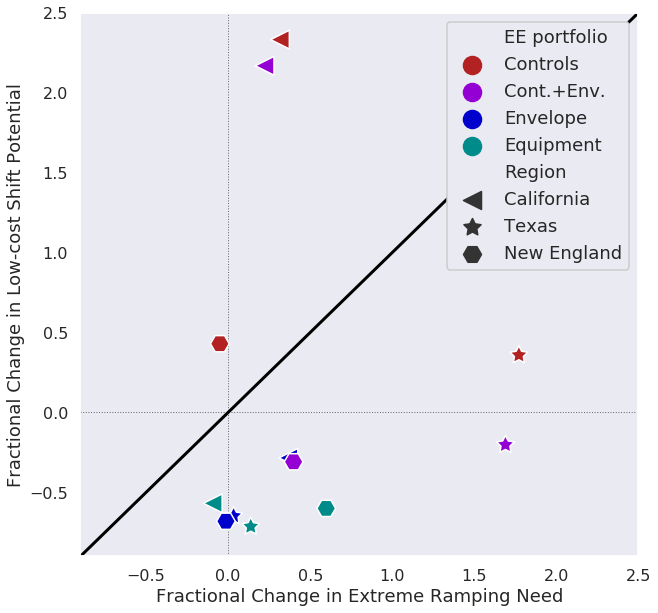

In [8]:
which_cost = 'Low-cost'
#which_cost = 'Benchmark'
#which_cost = 'High-cost'
metric_a = 'Extreme Ramping Need'
metric_b ='{c} Shift Potential'.format(c=which_cost)
fig = plot_metric_scatter(plot_data, x=metric_a, y=metric_b)


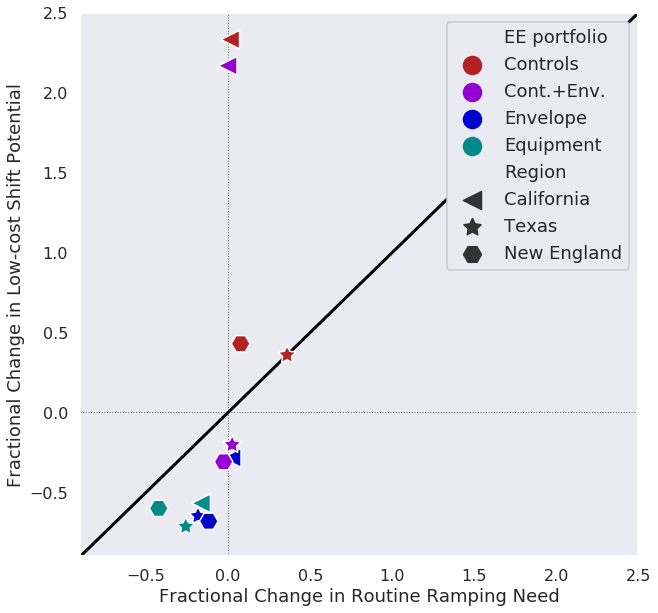

In [9]:
metric_a = 'Routine Ramping Need'
metric_b = '{c} Shift Potential'.format(c=which_cost)
fig = plot_metric_scatter(plot_data, x=metric_a, y=metric_b)

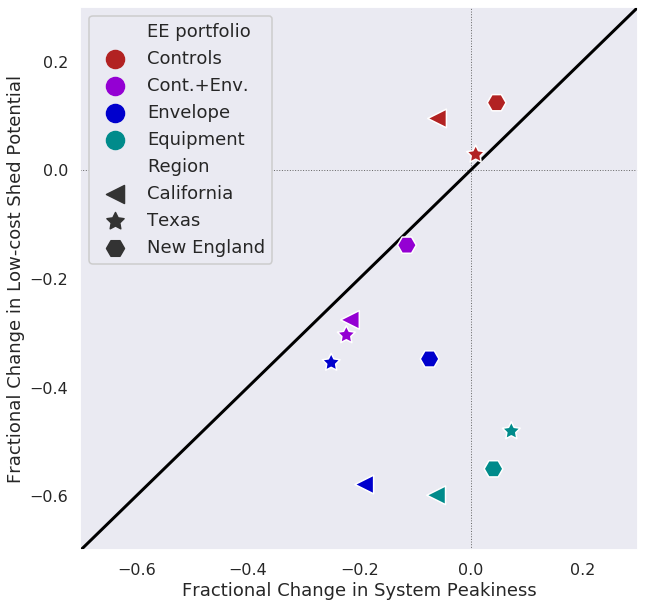

In [10]:

fig = plot_metric_scatter(plot_data, x='System Peakiness', 
                   y='{c} Shed Potential'.format(c=which_cost))


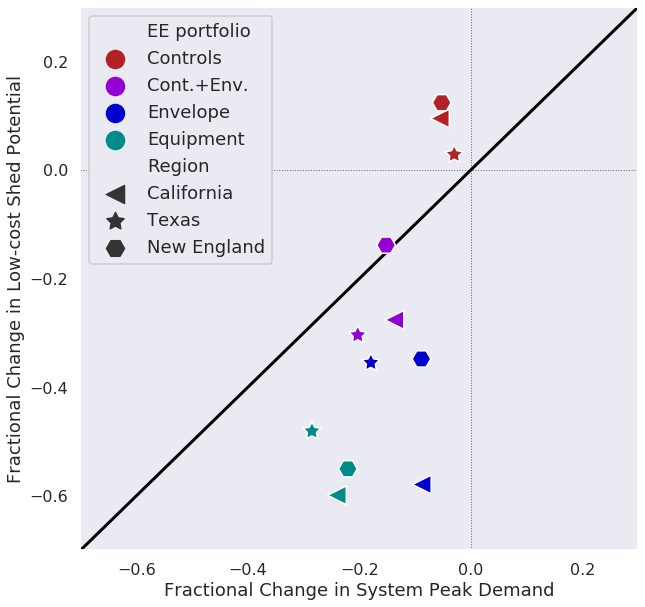

In [11]:

fig = plot_metric_scatter(plot_data, x='System Peak Demand', 
                   y='{c} Shed Potential'.format(c=which_cost))

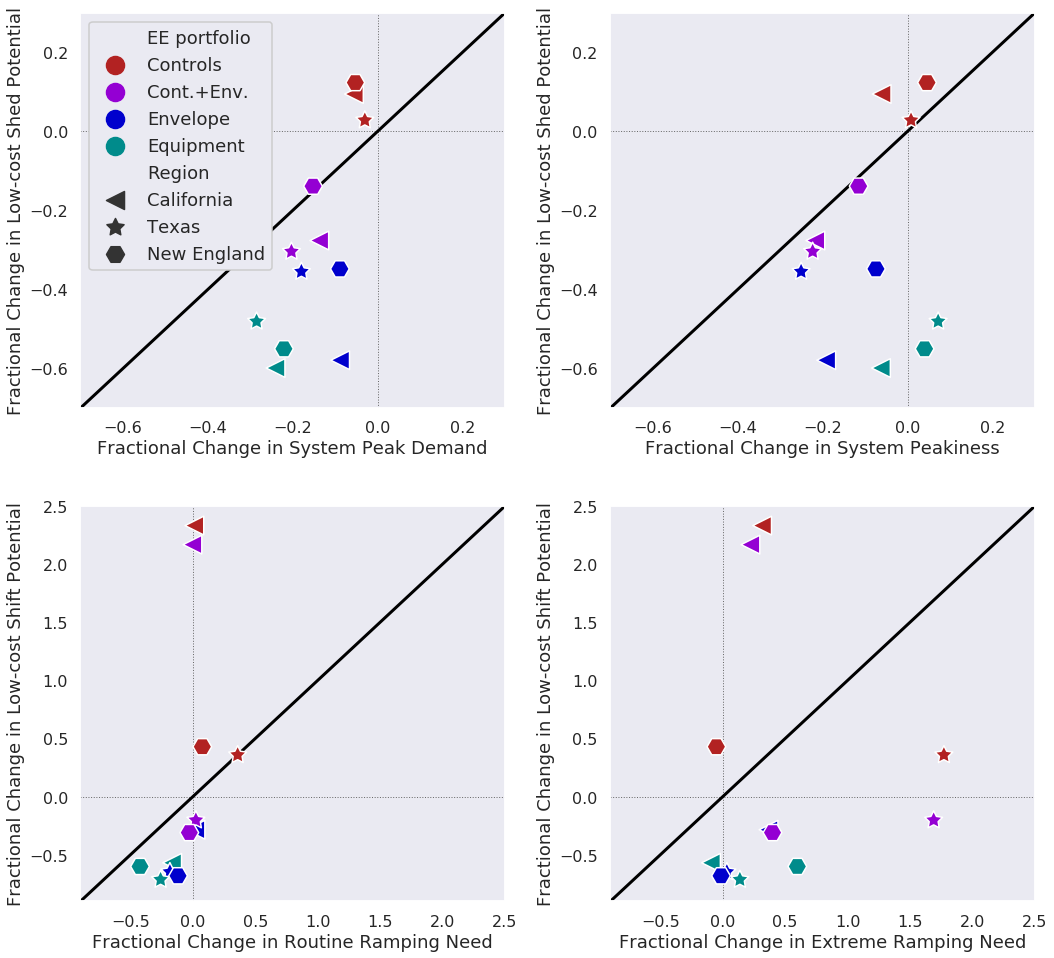

In [12]:
fig,axs = plt.subplots(2,2, figsize=[15,14])

opts = [('System Peak Demand', '{c} Shed Potential'.format(c=which_cost)), 
        ('System Peakiness', '{c} Shed Potential'.format(c=which_cost)), 
        ('Routine Ramping Need', '{c} Shift Potential'.format(c=which_cost)), 
        ('Extreme Ramping Need', '{c} Shift Potential'.format(c=which_cost)), 
       ]

for i, ax in enumerate(axs.flatten()):
    metric_a, metric_b = opts[i]
    ax = plot_metric_scatter(plot_data, x=metric_a, y=metric_b, ax=ax,
                             legend=i==0)
fig.tight_layout()
plt.savefig(os.path.join(outdir, 'Level2_scatter{n}_2by2.png'.format(
            n=noall)))

In [13]:
def plot_metric_linear(plot_data, ax, label=None, legend=False):

    
    ax.axhline(y=0, color='gray', linewidth=1.5, linestyle=":")
    ax.axhline(y=1, color='gray', linewidth=1.5, linestyle=":")
    ax.axhline(y=2, color='gray', linewidth=1.5, linestyle=":")
    ax.axvline(x=0, color='gray', linewidth=1)

    plot_data_reformed = plot_data[
            [n, 'EE portfolio', 'Region']
        ].melt(id_vars=['EE portfolio', 'Region'])
    
    #Add offsets if we have non-unique values
    for i in plot_data_reformed.index:
        for j in plot_data_reformed.index:
            if (i==j) or (plot_data_reformed.loc[i,'Region']!=plot_data_reformed.loc[j,'Region']):
                continue
            if abs((plot_data_reformed.loc[i,'value']-
                   plot_data_reformed.loc[j,'value']))<0.015:
                #Move me down a bit and you up a bit
                plot_data_reformed.loc[i,'value'] += 0.01
                plot_data_reformed.loc[j,'value'] -= 0.01
        
    sns.stripplot(
        data=plot_data_reformed,
        x='value', y='Region', 
        #style='EE portfolio', 
        hue='EE portfolio', s=18, jitter=False,
        palette=color_mapping_scen, #markers=symbol_mapping, 
        ax=ax, linewidth=1, edgecolor='white')
    if legend:
        pass
        
    else:
        ax.get_legend().remove()
    ax.set_xlabel('Fractional Change in Metric', fontsize=18)
    ax.set_ylabel('')
    ax.tick_params(axis='both', labelsize=18)
    ax.set_ylim(-1.,3.5)

    ax.text(0.55, 0.8, label, transform=ax.transAxes, fontsize=18)
    
    return ax
    

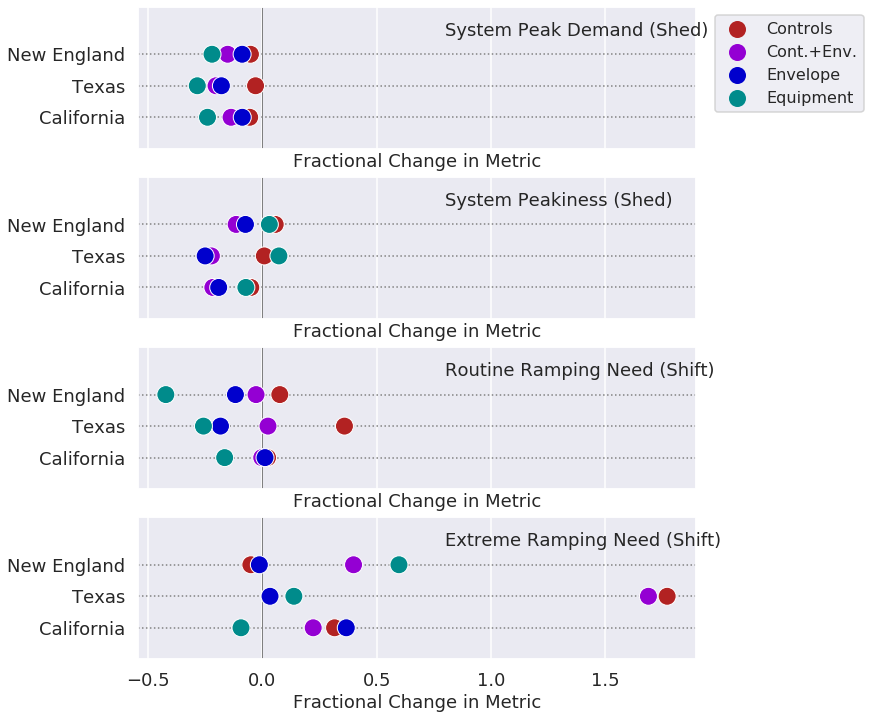

In [14]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(4,1, figsize=[10,12], sharex=True )
for iax, n in enumerate(metric_names.keys()):
    ax=axs[iax]
    plot_metric_linear(plot_data, ax, 
                       label=n+' '+metric_names[n], legend='full' if (iax==0) else False)


handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles,labels,
                 bbox_to_anchor=[1.02,1], loc='upper left', fontsize=16, markerscale=2)

fig.savefig(os.path.join(outdir, 'Level2a_1d_shift_shed_metrics{n}.png'.format(n=noall)), 
            bbox_inches='tight')

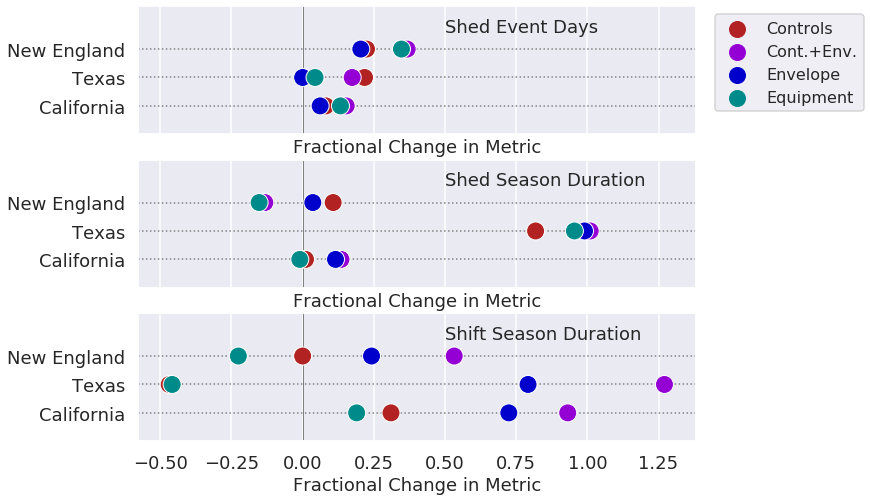

In [15]:
fig, axs = plt.subplots(3,1, figsize=[10,8], sharex=True )
for iax, n in enumerate(['Shed Event Days', 
                         'Shed Season Duration',
                         'Shift Season Duration']):
    ax=axs[iax]
    plot_metric_linear(plot_data, ax, 
                       label=n, legend='full' if (iax==0) else False)


handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles,labels,
                 bbox_to_anchor=[1.02,1], loc='upper left', fontsize=16, markerscale=2)
fig.savefig(os.path.join(outdir, 'Level2a_1d_program_design_metrics{n}.png'.format(n=noall)),
            bbox_inches='tight')

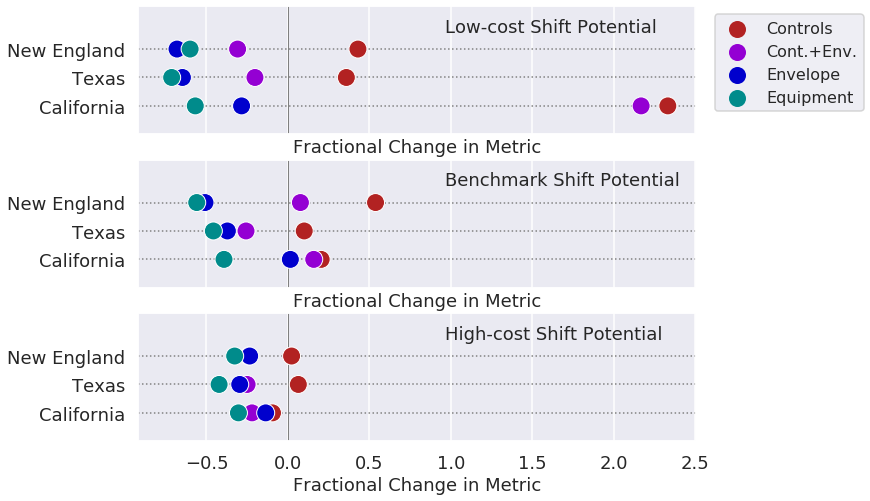

In [16]:
fig, axs = plt.subplots(3,1, figsize=[10,8], sharex=True )
for iax, n in enumerate(['Low-cost Shift Potential', 
                         'Benchmark Shift Potential',
                         'High-cost Shift Potential']):
    ax=axs[iax]
    plot_metric_linear(plot_data, ax, 
                       label=n, legend='full' if (iax==0) else False)


handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles,labels,
                 bbox_to_anchor=[1.02,1], loc='upper left', fontsize=16, markerscale=2)
fig.savefig(os.path.join(outdir, 'Level2b_1d_shift_metrics{n}.png'.format(n=noall)),
            bbox_inches='tight')

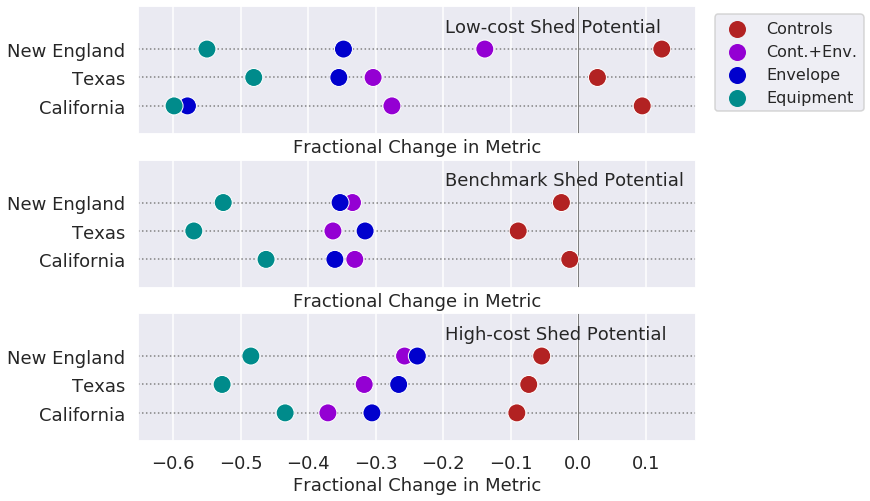

In [17]:
fig, axs = plt.subplots(3,1, figsize=[10,8], sharex=True )
for iax, n in enumerate(['Low-cost Shed Potential', 
                         'Benchmark Shed Potential',
                         'High-cost Shed Potential']):
    ax=axs[iax]
    plot_metric_linear(plot_data, ax, 
                       label=n, legend='full' if (iax==0) else False)


handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles,labels,
                 bbox_to_anchor=[1.02,1], loc='upper left', fontsize=16, markerscale=2)
fig.savefig(os.path.join(outdir, 'Level2b_1d_shed_metrics{n}.png'.format(n=noall)),
            bbox_inches='tight')

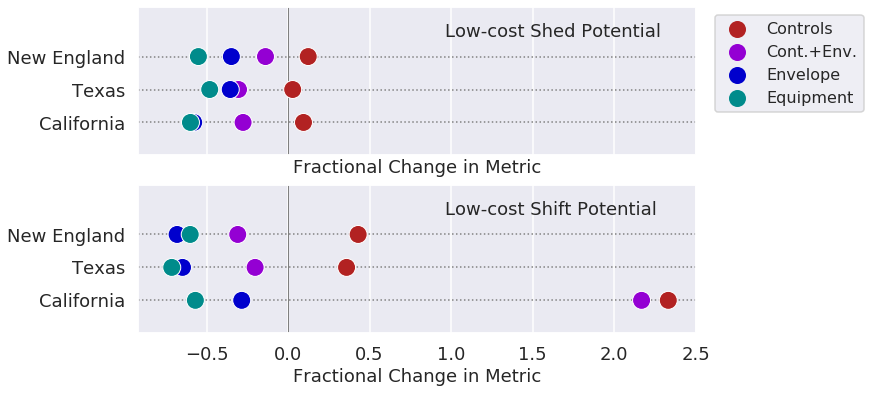

In [18]:
fig, axs = plt.subplots(2,1, figsize=[10,6], sharex=True )
for iax, n in enumerate(['Low-cost Shed Potential', 
                         'Low-cost Shift Potential']):
    ax=axs[iax]
    plot_metric_linear(plot_data, ax, 
                       label=n, legend='full' if (iax==0) else False)


handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles,labels,
                 bbox_to_anchor=[1.02,1], loc='upper left', fontsize=16, markerscale=2)
fig.savefig(os.path.join(outdir, 'Level2b_1d_low-cost_metrics{n}.png'.format(n=noall)),
            bbox_inches='tight')

## Make plots of change in 2b resource by sector

In [19]:
def compute_resource_differences(by = ['sector']):
    plot_data=[]

    for region in region_mapping.keys():
        datasets = []
        for dr_type in ['shift','shed']:
            data=pd.read_csv(os.path.join(indir,'price_referent_data_{r}_{t}_50_100_600.csv'.format(t=dr_type, r=region)), 
                                     index_col=0)
            data = data.groupby(['scenario',]+by+['procurement_price'])['value'].sum().unstack(
                ).rename(
                columns={50.0:'Low-cost {t} Potential'.format(t=dr_type.capitalize()),
                         100.0:'Benchmark {t} Potential'.format(t=dr_type.capitalize()),
                         600.0:'High-cost {t} Potential'.format(t=dr_type.capitalize()),})
            data=data-data.loc['Baseline']#-1#*100-100
            data = data.loc[data.index != 'Baseline'].rename(index={
                'All':'All',
                'Controls Upgrades':'Controls',
                'Controls and Envelope': 'Cont.+Env.',
                'Envelope Upgrade':'Envelope',
                'Equipment Upgrade':'Equipment'
            })

            datasets += [data]
        pdata = pd.concat(datasets, axis=1)




        pdata['Region'] = region_mapping[region]
        plot_data += [pdata.reset_index().rename(columns={'scenario':'EE Portfolio'})]

    plot_data = pd.concat(plot_data, ignore_index=True).rename(columns=colname_mapping)
    return plot_data

In [20]:
plot_data = compute_resource_differences()
plot_data

procurement_price EE Portfolio       sector  Low-cost Shift Potential  \
0                          All   Commercial                 -0.108688   
1                          All  Residential                 -0.067443   
2                     Baseline   Commercial                  0.000000   
3                     Baseline  Residential                  0.000000   
4                     Controls   Commercial                  0.625979   
5                     Controls  Residential                  2.116443   
6                   Cont.+Env.   Commercial                  0.439006   
7                   Cont.+Env.  Residential                  2.110700   
8                     Envelope   Commercial                 -0.087471   
9                     Envelope  Residential                 -0.247106   
10                   Equipment   Commercial                 -0.421745   
11                   Equipment  Residential                 -0.247106   
12                         All   Commercial                 -3.193025   
13                         All  Residential                 -7.703191   
14                    Baseline   Commercial                  0.000000   
15                    Baseline  Residential                  0.000000   
16                    Controls   Commercial                  0.274171   
17                    Controls  Residential                  4.582796   
18                  Cont.+Env.   Commercial                 -1.428296   
19                  Cont.+Env.  Residential                 -1.312335   
20                    Envelope   Commercial                 -1.874212   
21                    Envelope  Residential                 -6.896299   
22                   Equipment   Commercial                 -2.478739   
23                   Equipment  Residential                 -7.185735   
24                         All   Commercial                 -0.096996   
25                         All  Residential                 -0.647099   
26                    Baseline   Commercial                  0.000000   
27                    Baseline  Residential                  0.000000   
28                    Controls   Commercial                  0.614734   
29                    Controls  Residential                 -0.003510   
30                  Cont.+Env.   Commercial                  0.131441   
31                  Cont.+Env.  Residential                 -0.570805   
32                    Envelope   Commercial                 -0.158971   
33                    Envelope  Residential                 -0.809470   
34                   Equipment   Commercial                 -0.205727   
35                   Equipment  Residential                 -0.648293   

procurement_price  Benchmark Shift Potential  High-cost Shift Potential  \
0                                  -0.887576                  -3.158123   
1                                  -0.547581                  -1.880295   
2                                   0.000000                   0.000000   
3                                   0.000000                   0.000000   
4                                   0.154364                  -0.564258   
5                                   0.839208                  -0.441347   
6                                  -0.013587                  -1.570144   
7                                   0.785020                  -0.770562   
8                                   0.095711                  -0.960113   
9                                  -0.023045                  -0.489590   
10                                 -0.868428                  -2.038964   
11                                 -1.042397                  -1.185933   
12                                 -8.531374                 -10.268343   
13                                 -7.271755                  -7.958493   
14                                  0.000000                   0.000000   
15                                  0.000000                   0.000000   
16                     

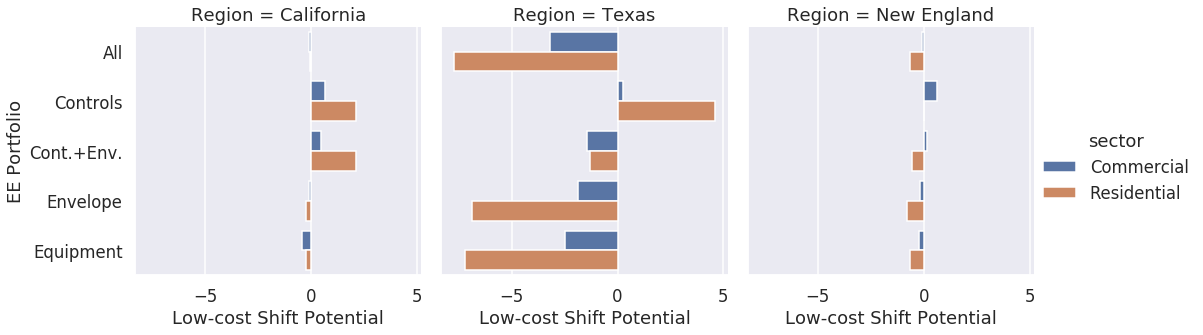

In [21]:
import seaborn as sns

sns.catplot(y='EE Portfolio', x='Low-cost Shift Potential', hue='sector', col='Region', kind='bar',
            data=plot_data.loc[(plot_data['EE Portfolio']!='Baseline')])

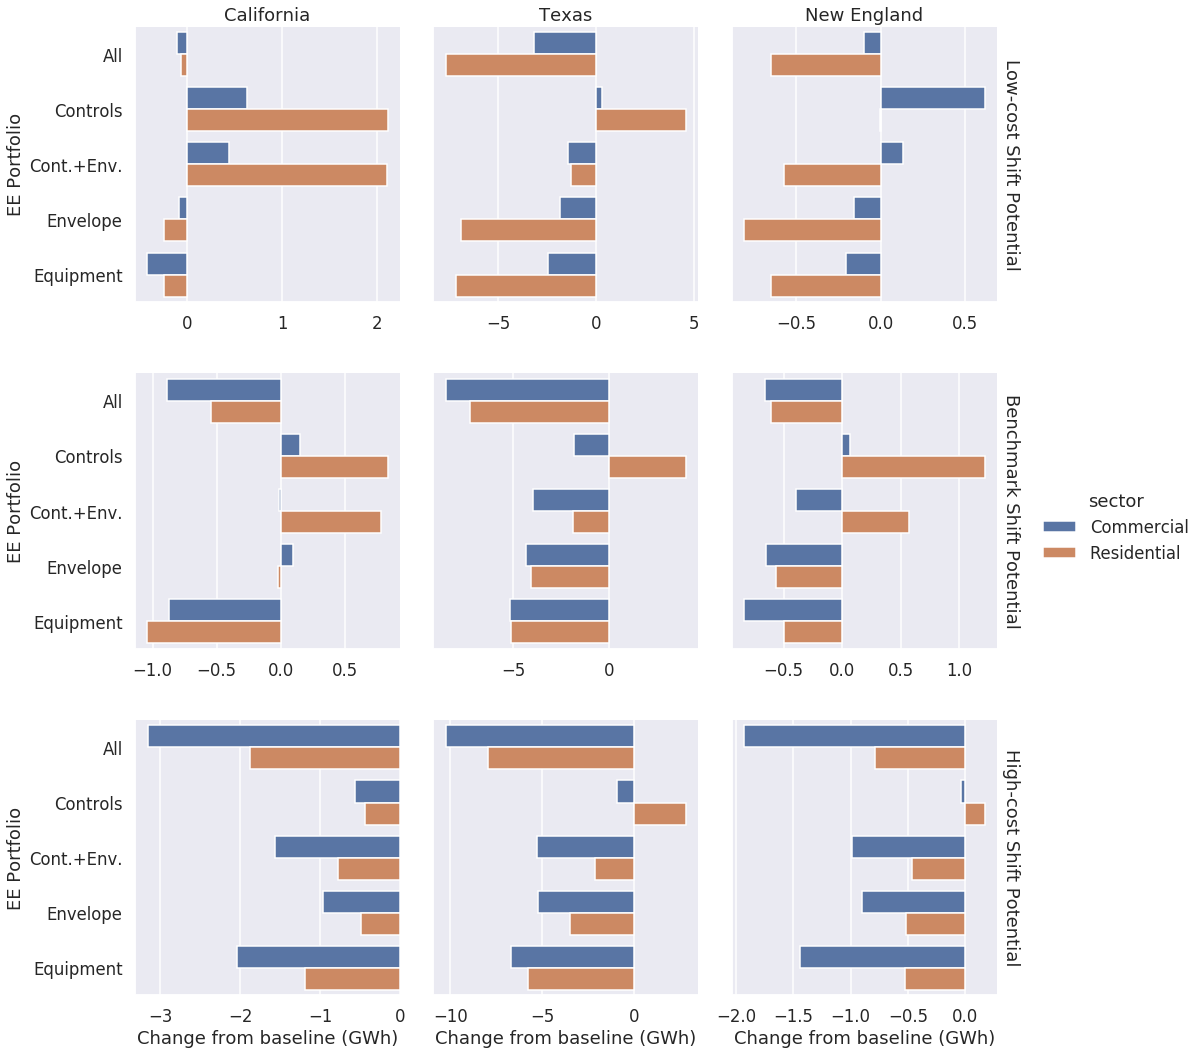

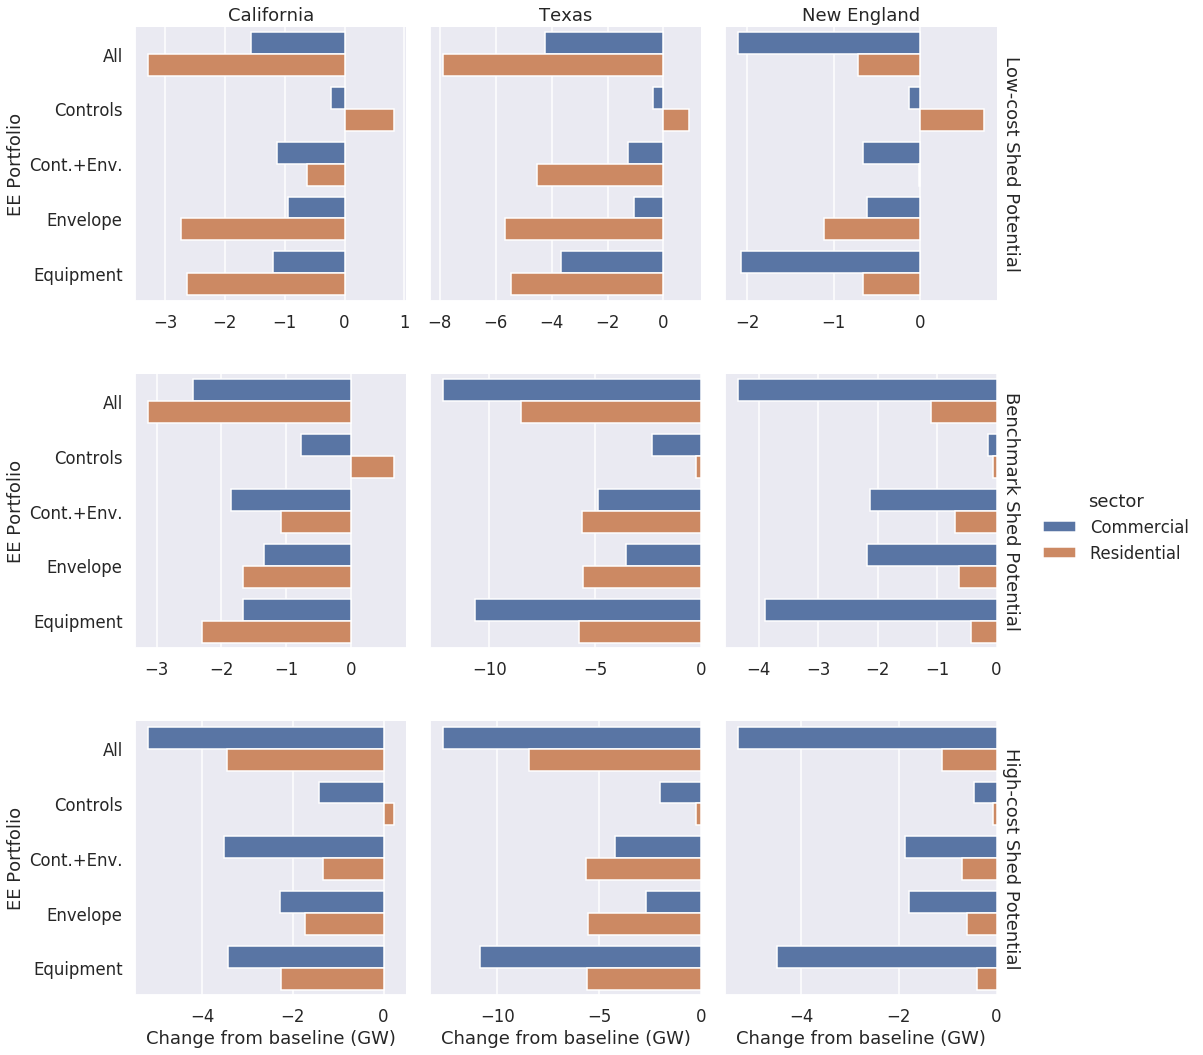

In [22]:
barplot_data = plot_data.loc[(plot_data['EE Portfolio']!='Baseline')].melt(
                id_vars=plot_data.columns[~plot_data.columns.str.contains('Potential')]).rename(
    columns={'value':'Change from baseline',
             'procurement_price':'Quantity'})

for dr_type in ['shift','shed']:
    g=sns.catplot(y='EE Portfolio', x='Change from baseline', hue='sector',
                row='Quantity', col='Region', kind='bar', ci=None,
                margin_titles=True, sharex=False,
                data=barplot_data.loc[barplot_data['Quantity'].str.contains(dr_type.capitalize())])
    (g.set_titles(row_template="{row_name}", col_template="{col_name}")
      .set_xlabels('Change from baseline (GW{h})'.format(h='h' if dr_type=='shift' else ''))
    )
    g.savefig(os.path.join(outdir, 'Level2b_{t}_delta_by_sector.png'.format(t=dr_type)),
              bbox_inches='tight')

### Now plot changes by end use

In [23]:
plot_data = compute_resource_differences(by=['sector','end_use']).fillna(0)
plot_data['end_use'] = plot_data['end_use'].str.replace('s$','')
plot_data['End Use'] = (plot_data['end_use']+', '+plot_data['sector'].str.slice(0,3)).str.title()
cut=plot_data['End Use'].str.contains('Space')
plot_data.loc[cut, 'End Use'] = plot_data.loc[cut,'End Use'].str.slice(6,)

#plot_data.loc[plural, 'End Use'] = plot_data.loc[plural,'End Use'].str.slice(,-1)
plot_data['End Use'].unique()

array(['Refrigeration, Com', 'Cooling, Com', 'Heating, Com',
       'Water Heating, Com', 'Interior Equipment, Com', 'Lighting, Com',
       'Clothes Dryer, Res', 'Dishwasher, Res', 'Pool Pump, Res',
       'Cooling, Res', 'Heating, Res', 'Water Heating, Res',
       'Clothes Washer, Res', 'Refrigeration, Res'], dtype=object)

In [24]:
#base_dir = r'G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data'
base_dir = os.path.join(indir,'..')
palette_df = pd.read_csv(os.path.join(base_dir, 'end_use_color_palette_detailed.csv'))
palette = dict([(palette_df.loc[i,'Display name'], palette_df.loc[i,'Color']) for i in palette_df.index])
palette

{'Cooling, Res': '#66c2a5',
 'Heating, Res': '#fc8d62',
 'Lighting, Res': '#ffd92f',
 'Clothes Washer, Res': '#7fc97f',
 'Clothes Dryer, Res': '#a6d854',
 'Dishwasher, Res': '#ffff99',
 'Cooking, Res': '#fdc086',
 'Refrigeration, Res': '#beaed4',
 'Water Heating, Res': '#e78ac3',
 'Plug Loads, Res': '#e5c494',
 'Pool Pump, Res': '#386cb0',
 'Other, Res': '#b3b3b3',
 'Cooling, Com': '#1b9e77',
 'Heating, Com': '#d95f02',
 'Lighting, Com': '#e6ab02',
 'Refrigeration, Com': '#7570b3',
 'Water Heating, Com': '#e7298a',
 'Interior Equipment, Com': '#a6761d',
 'HVAC System, Com': '#66a61e'}

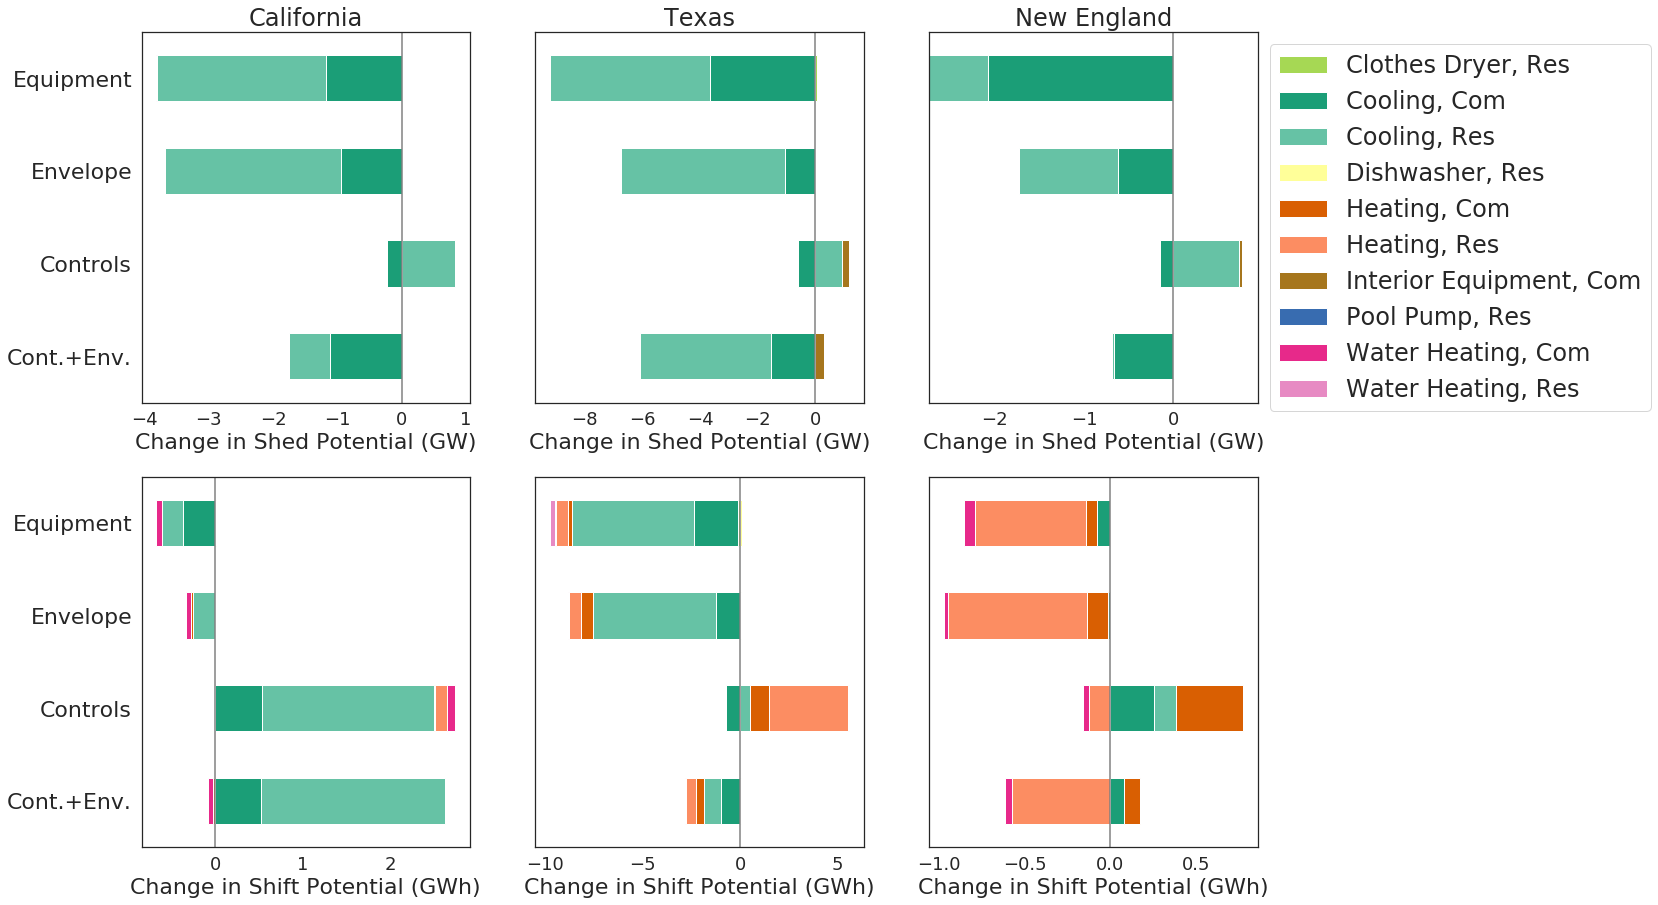

In [40]:


#metric = 'Low-cost Shift Potential'
regions = plot_data['Region'].unique()


eus = plot_data['End Use'].unique()
eus = [e.title() for e in eus]
eus.sort()

#palette = dict(zip(eus, sns.color_palette('tab20', len(eus))))
sns.set_theme(style='white')

fig,axs=plt.subplots(2, len(regions), figsize=[20,15], sharey=True)
all_handles = []
all_labels = []
for j, typ in enumerate(['Shed','Shift']):
    metric = 'Low-cost {t} Potential'.format(t=typ)
    for i,r in enumerate(regions):
        ax=axs[j,i]
        ax.axvline(0, color='gray')
        pdata = plot_data.loc[(plot_data['EE Portfolio']!='Baseline') & 
                              (plot_data['EE Portfolio']!='All') & 
                              (plot_data['Region']==r)]
        barplot_data = pdata.set_index(['End Use','EE Portfolio'])[metric].unstack().T
        barplot_data.columns = pd.CategoricalIndex([c.title() for c in barplot_data.columns.values],
                                                   ordered=True,
                                                   categories=eus)
        barplot_data.sort_index(axis=1, inplace=True)
        ax = barplot_data.loc[:,(abs(barplot_data)>1.e-3).any()].plot.barh(
            stacked=True, color=palette, legend=False, ax=ax, fontsize=22)#r==regions[0], ax=ax)
        ax.tick_params(axis='x', labelsize=18, length=5)
        ax.set_ylabel('')
        ax.set_xlabel('Change in {t} Potential (GW{h})'.format(t=typ,
                                                               h='h' if typ=='Shift' else ''),
                     fontsize=22)
        handles, labels = ax.get_legend_handles_labels()
        for h,l in zip(handles,labels):
            if l not in all_labels:
                all_handles.append(h)
                all_labels.append(l)
#        all_handles += [h for h in handles if h not in all_handles]
        if j==0:
            ax.set_title(r, fontsize=24)
    


#create legend and sort the labels so that like end uses are paired
#all_labels.sort()
axs[0,2].legend(bbox_to_anchor=[1,1], loc='upper left', fontsize=24,
                handles=[all_handles[i] for i in np.array(all_labels).argsort()])

plt.savefig(os.path.join(outdir, 'Level2b_bar_by_enduse_lowcost_noall.png'.format(
            n=noall)))

In [26]:
pd.__version__

'1.1.5'